In [27]:
# Imports
from pathlib import Path
from scipy.io import loadmat
from scipy.signal import find_peaks, peak_widths
import scipy.stats as stats
from scipy.stats import kruskal, mannwhitneyu
from itertools import combinations
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
from matplotlib.table import Table
import numpy as np
import pandas as pd
import os
from PIL import Image

#test what directory code is on
print (os.getcwd())

c:\Users\jacki\OneDrive\Desktop\Jupyter_Lab


#check if the file is corrupted/you have read access
file_path = '/Users/jacqui/Desktop/Jupyter_Notebooks/Polar_Plot_Index_Histo/Group_map_4to5/Horizontal_4to5_All_OSIgrouped_VPS_data.mat'
print(os.access(file_path, os.R_OK))  # This should print True if you have read access

In [28]:
#Paths and data conversion from degrees into radians

import numpy as np
from scipy.io import loadmat

# Define the file paths and corresponding labels; TP stands for timepoint
file_paths = {
    'TP1': 'Y:/Jacqui/Critical_Period_processed&raw/Processed data/All_Grouped/3to4/Control/3to4_Control.mat',
    'TP2': 'Y:/Jacqui/Critical_Period_processed&raw/Processed data/All_Grouped/4to5/Control/4to5_Control.mat',
    'TP3': 'Y:/Jacqui/Critical_Period_processed&raw/Processed data/All_Grouped/4to6/Control/4to6_Control.mat',
    'TP4': 'Y:/Jacqui/Critical_Period_processed&raw/Processed data/PR_3to5_im7_Grouped/control-7dpfgrouped_VPS_data (1).mat'
}

# Initialize dictionaries to store the extracted and converted data
fitted_osi_angle_rad = {}
fitted_osi_angle_deg = {}
fitted_osi_angle_deg_mod = {}
mirrored_deg = {}

# Specify the directory where you want to save the plots
save_dir = 'Y:/Jacqui/Critical_Period_processed&raw/Processed data/Analysis/Graphs_FENS_2025'  # Replace with your desired directory
output_directory = save_dir

# Loop through each dataset
for label, path in file_paths.items():
    # Load the .mat file
    data = loadmat(path)
    
    # Access the variable
    variable = data['DEFAULTS_POST_GROUP']
    
    # Extract the specific field - ensure proper indexing
    fitted_osi_angle_rad[label] = variable['fitted_osi_angle'].item()
    
    # Convert radians into degrees
    fitted_osi_angle_deg[label] = np.rad2deg(fitted_osi_angle_rad[label])
    
    # Mirrored without flip
    mirrored_deg[label] = np.where(fitted_osi_angle_deg[label] > 180, 
                                   fitted_osi_angle_deg[label] - 180, 
                                   fitted_osi_angle_deg[label])
    
# Modify arrays in the dictionary
for label, angles in mirrored_deg.items():
    # Filter values between 0 and 25
    mask = (angles >= 0) & (angles <= 25)
    
    # Modify the values: add 180 to filtered values
    modified_angles = np.where(mask, angles + 180, angles)
    
    # Update the dictionary with the modified array
    fitted_osi_angle_deg_mod[label] = modified_angles

# Extract the variables for each condition
fitted_osi_angle_rad_TP1 = fitted_osi_angle_rad['TP1']
fitted_osi_angle_deg_TP1 = fitted_osi_angle_deg['TP1']
fitted_osi_angle_deg_mod_TP1 = fitted_osi_angle_deg_mod['TP1']

fitted_osi_angle_rad_TP2 = fitted_osi_angle_rad['TP2']
fitted_osi_angle_deg_TP2 = fitted_osi_angle_deg['TP2']
fitted_osi_angle_deg_mod_TP2 = fitted_osi_angle_deg_mod['TP2']

fitted_osi_angle_rad_TP3 = fitted_osi_angle_rad['TP3']
fitted_osi_angle_deg_TP3 = fitted_osi_angle_deg['TP3']
fitted_osi_angle_deg_mod_TP3 = fitted_osi_angle_deg_mod['TP3']

fitted_osi_angle_rad_TP4 = fitted_osi_angle_rad['TP4']
fitted_osi_angle_deg_TP4 = fitted_osi_angle_deg['TP4']
fitted_osi_angle_deg_mod_TP4 = fitted_osi_angle_deg_mod['TP4']

Plot saved as PNG to Y:/Jacqui/Critical_Period_processed&raw/Processed data/Analysis/Graphs_FENS_2025\overlayed_histograms_with_peaks.png
Plot saved as SVG to Y:/Jacqui/Critical_Period_processed&raw/Processed data/Analysis/Graphs_FENS_2025\overlayed_histograms_with_peaks.svg


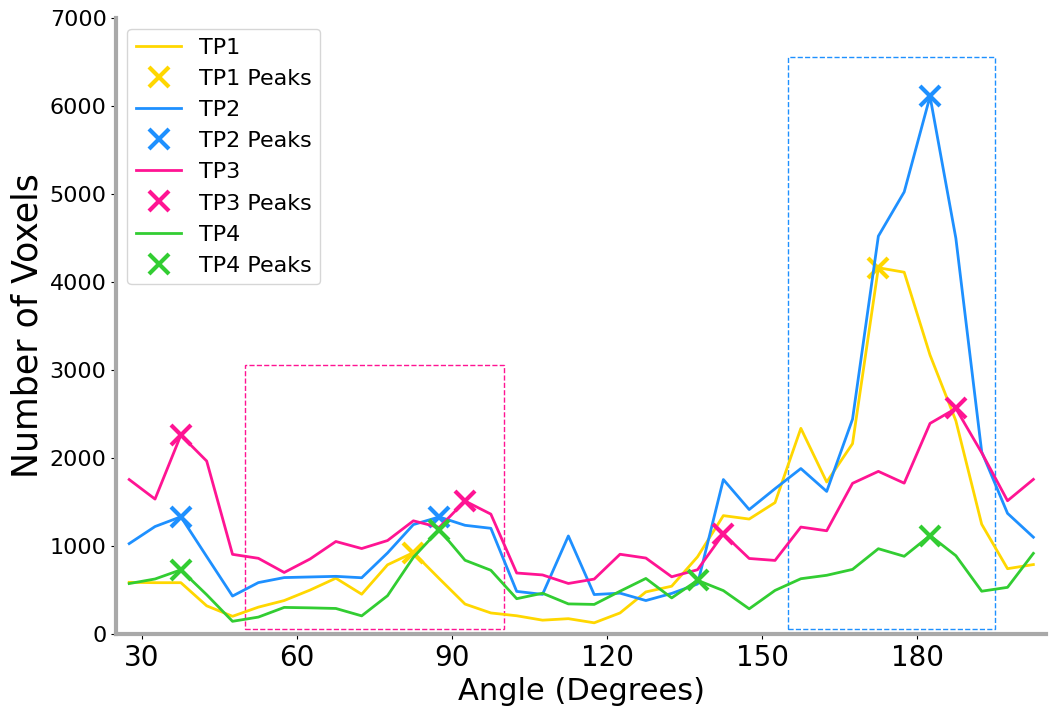

Peak data saved to Y:/Jacqui/Critical_Period_processed&raw/Processed data/Analysis/Graphs_FENS_2025\peak_data.xlsx


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pandas as pd
import os

# Assuming you have four separate datasets
datasets = [
    fitted_osi_angle_deg_mod_TP1, 
    fitted_osi_angle_deg_mod_TP2, 
    fitted_osi_angle_deg_mod_TP3, 
    fitted_osi_angle_deg_mod_TP4
]
dataset_labels = ['TP1', 'TP2', 'TP3', 'TP4']  # Labels for datasets

# Define a list of colors to differentiate the datasets in the plot
colors = ['gold', 'dodgerblue', 'deeppink', 'limegreen']

# Create a figure for the plot
plt.figure(figsize=(12, 8))

# Prepare a list to store peak data for all datasets
peak_data = []

# Loop through each dataset
for i, data in enumerate(datasets):
    # Create histogram
    hist, bin_edges = np.histogram(data, bins=36, range=(25, 205))
    
    # Calculate bin centers (to represent the degrees)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Find peaks in the histogram
    peaks, _ = find_peaks(hist, distance=9)  # Adjust the distance if necessary
    
    # Collect peak data for this dataset
    for peak in peaks:
        peak_degree = bin_centers[peak]  # Convert peak index to degrees
        peak_value = hist[peak]  # Frequency value at the peak
        peak_data.append({
            'Dataset': dataset_labels[i], 
            'Peak Degree': peak_degree,
            'Frequency': peak_value
        })   
    
    # Plot the histogram
    plt.plot(bin_centers, hist, label=f'{dataset_labels[i]}', color=colors[i], linewidth=2)
    
    # Plot the peaks
    plt.plot(bin_centers[peaks], hist[peaks], "x", color=colors[i], markersize=15, markeredgewidth=3, label=f'{dataset_labels[i]} Peaks')

# Add labels and title
plt.xlabel('Angle (Degrees)', fontsize=22)
plt.ylabel('Number of Voxels', fontsize=25)
plt.grid(False)

# Set x-axis limits and ticks
plt.xlim([25, 205])
plt.xticks(np.arange(30, 210, 30), fontsize=20)  # Start at 30 and have intervals of 30

# Set font size of y ticks
plt.yticks(fontsize=16)

# Get y-axis limits to draw full-length rectangles
plt.ylim(0,7000)

# Set font size of legend
plt.rcParams['legend.fontsize'] = 16  # Set global font size for legends

# Draw dashed rectangles around specified ranges
plt.gca().add_patch(plt.Rectangle((50, 50), 50, 3000, edgecolor='deeppink', linestyle='--', fill=False))
plt.gca().add_patch(plt.Rectangle((155, 50), 40, 6500, edgecolor='dodgerblue', linestyle='--', fill=False))

# Remove borders (top, right, left, and bottom)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(3)
plt.gca().spines['bottom'].set_linewidth(3)
plt.gca().spines['left'].set_color('darkgrey')
plt.gca().spines['bottom'].set_color('darkgrey')

# Add legend and display the plot
plt.legend()

# Save the figure in the specified directory as PNG and SVG
if not os.path.exists(save_dir):
    print(f"Error: The directory {save_dir} does not exist.")
else:
    save_path_png = os.path.join(save_dir, 'overlayed_histograms_with_peaks.png')
    save_path_svg = os.path.join(save_dir, 'overlayed_histograms_with_peaks.svg')
    plt.savefig(save_path_png)  # Save as PNG
    plt.savefig(save_path_svg)  # Save as SVG
    print(f"Plot saved as PNG to {save_path_png}")
    print(f"Plot saved as SVG to {save_path_svg}")
    
    plt.show()

# Close the plot
plt.close()

# Convert the collected peak data to a DataFrame
df_peak_data = pd.DataFrame(peak_data)

# Save the DataFrame to an Excel file
excel_path = os.path.join(save_dir, 'peak_data.xlsx')
df_peak_data.to_excel(excel_path, index=False)
print(f"Peak data saved to {excel_path}")


In [30]:
df_peak_data

,Dataset,Peak Degree,Frequency
0,TP1,82.5,922
1,TP1,172.5,4159
2,TP2,37.5,1329
3,TP2,87.5,1327
4,TP2,182.5,6106
5,TP3,37.5,2257
6,TP3,92.5,1508
7,TP3,142.5,1135
8,TP3,187.5,2560
9,TP4,37.5,726


In [31]:
# PICKING OUT PEAKS FOR INDEX
# Ensure that only one value is picked for each peak

# Load the peak data into a DataFrame
df = pd.DataFrame(df_peak_data)

# TP1 Indices
# Filter rows where Dataset is 'TP1' and Peak Degree is in the horizontal range
filtered_df_1 = df[(df['Dataset'] == 'TP1') & (df['Peak Degree'] >= 65) & (df['Peak Degree'] <= 120)]

# Extract Peak Value from the filtered DataFrame
tp1_horiz_peak_value = filtered_df_1['Frequency']

# Print the result
print("Horizontal Peak Value for TP1:")
print(tp1_horiz_peak_value.values)

# Filter rows where Dataset is 'TP1' and Peak Degree is in the vertical range
filtered_df_2 = df[(df['Dataset'] == 'TP1') & (df['Peak Degree'] >= 160) & (df['Peak Degree'] <= 190)]

# Extract Peak Value from the filtered DataFrame
tp1_vert_peak_value = filtered_df_2['Frequency']

# Print the result
print("Vertical Peak Value for TP1:")
print(tp1_vert_peak_value.values)


# TP2 Indices
# Filter rows where Dataset is 'TP2' and Peak Degree is in the horizontal range
filtered_df_3 = df[(df['Dataset'] == 'TP2') & (df['Peak Degree'] >= 65) & (df['Peak Degree'] <= 120)]

# Extract Peak Value from the filtered DataFrame
tp2_horiz_peak_value = filtered_df_3['Frequency']

# Print the result
print("Horizontal Peak Value for TP2:")
print(tp2_horiz_peak_value.values)

# Filter rows where Dataset is 'TP2' and Peak Degree is in the vertical range
filtered_df_4 = df[(df['Dataset'] == 'TP2') & (df['Peak Degree'] >= 160) & (df['Peak Degree'] <= 190)]

# Extract Peak Value from the filtered DataFrame
tp2_vert_peak_value = filtered_df_4['Frequency']

# Print the result
print("Vertical Peak Value for TP2:")
print(tp2_vert_peak_value.values)


# TP3 Indices
# Filter rows where Dataset is 'TP3' and Peak Degree is in the horizontal range
filtered_df_5 = df[(df['Dataset'] == 'TP3') & (df['Peak Degree'] >= 65) & (df['Peak Degree'] <= 120)]

# Extract Peak Value from the filtered DataFrame
tp3_horiz_peak_value = filtered_df_5['Frequency']

# Print the result
print("Horizontal Peak Value for TP3:")
print(tp3_horiz_peak_value.values)

# Filter rows where Dataset is 'TP3' and Peak Degree is in the vertical range
filtered_df_6 = df[(df['Dataset'] == 'TP3') & (df['Peak Degree'] >= 160) & (df['Peak Degree'] <= 190)]

# Extract Peak Value from the filtered DataFrame
tp3_vert_peak_value = filtered_df_6['Frequency']

# Print the result
print("Vertical Peak Value for TP3:")
print(tp3_vert_peak_value.values)


# TP4 Indices
# Filter rows where Dataset is 'TP4' and Peak Degree is in the horizontal range
filtered_df_7 = df[(df['Dataset'] == 'TP4') & (df['Peak Degree'] >= 65) & (df['Peak Degree'] <= 120)]

# Extract Peak Value from the filtered DataFrame
tp4_horiz_peak_value = filtered_df_7['Frequency']

# Print the result
print("Horizontal Peak Value for TP4:")
print(tp4_horiz_peak_value.values)

# Filter rows where Dataset is 'TP4' and Peak Degree is in the vertical range
filtered_df_8 = df[(df['Dataset'] == 'TP4') & (df['Peak Degree'] >= 160) & (df['Peak Degree'] <= 190)]

# Extract Peak Value from the filtered DataFrame
tp4_vert_peak_value = filtered_df_8['Frequency']

# Print the result
print("Vertical Peak Value for TP4:")
print(tp4_vert_peak_value.values)

Horizontal Peak Value for TP1:
[922]
Vertical Peak Value for TP1:
[4159]
Horizontal Peak Value for TP2:
[1327]
Vertical Peak Value for TP2:
[6106]
Horizontal Peak Value for TP3:
[1508]
Vertical Peak Value for TP3:
[2560]
Horizontal Peak Value for TP4:
[1183]
Vertical Peak Value for TP4:
[1116]


In [32]:
# Calculate Vertical Angle Preference Index for each dataset

# TP1 Vertical Index
tp1_index = tp1_vert_peak_value.values / (tp1_vert_peak_value.values + tp1_horiz_peak_value.values)
# Store the result in a pandas Series
tp1_index_array = pd.Series(tp1_index)
# Print the result
print("TP1 Channels Vertical Angle Preference Index:")
print(tp1_index_array.values)

# TP2 Vertical Index
tp2_index = tp2_vert_peak_value.values / (tp2_vert_peak_value.values + tp2_horiz_peak_value.values)
# Store the result in a pandas Series
tp2_index_array = pd.Series(tp2_index)
# Print the result
print("TP2 Channels Vertical Angle Preference Index:")
print(tp2_index_array.values)

# TP3 Vertical Index
tp3_index = tp3_vert_peak_value.values / (tp3_vert_peak_value.values + tp3_horiz_peak_value.values)
# Store the result in a pandas Series
tp3_index_array = pd.Series(tp3_index)
# Print the result
print("TP3 Channels Vertical Angle Preference Index:")
print(tp3_index_array.values)

# TP4 Vertical Index
tp4_index = tp4_vert_peak_value.values / (tp4_vert_peak_value.values + tp4_horiz_peak_value.values)
# Store the result in a pandas Series
tp4_index_array = pd.Series(tp4_index)
# Print the result
print("TP4 Channels Vertical Angle Preference Index:")
print(tp4_index_array.values)


TP1 Channels Vertical Angle Preference Index:
[0.81853966]
TP2 Channels Vertical Angle Preference Index:
[0.82147181]
TP3 Channels Vertical Angle Preference Index:
[0.62930187]
TP4 Channels Vertical Angle Preference Index:
[0.48542845]


H OSI for TP1 group: 2764
V OSI for TP1 group: 12926
TP1 population V index: 0.8238368387507967
H OSI for TP2 group: 4955
V OSI for TP2 group: 19142
TP2 population V index: 0.7943727434950408
H OSI for TP3 group: 5078
V OSI for TP3 group: 8666
TP3 population V index: 0.6305296856810244
H OSI for TP4 group: 3542
V OSI for TP4 group: 3552
TP4 population V index: 0.5007048209754722


C:\Users\jacki\AppData\Local\Temp\ipykernel_47940\4126668408.py:144: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend().set_visible(False)


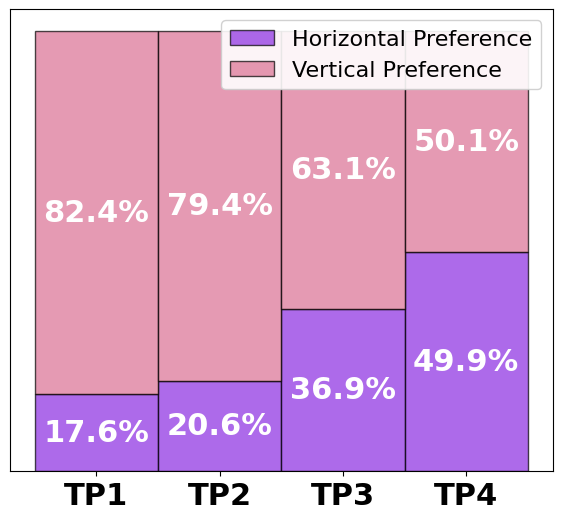

OSI percentages bar graph saved as PNG to: Y:/Jacqui/Critical_Period_processed&raw/Processed data/Analysis/Graphs_FENS_2025\HvsV_percentages_bar_graph.png
OSI percentages bar graph saved as SVG to: Y:/Jacqui/Critical_Period_processed&raw/Processed data/Analysis/Graphs_FENS_2025\HvsV_percentages_bar_graph.svg


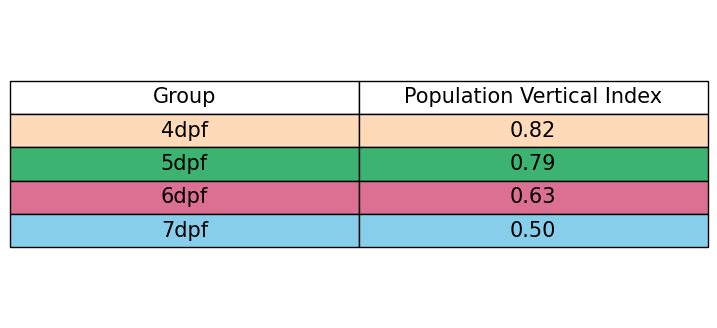

Population Vertical Index table saved as PNG to: Y:/Jacqui/Critical_Period_processed&raw/Processed data/Analysis/Graphs_FENS_2025\population_vertical_index_table.png
Population Vertical Index table saved as SVG to: Y:/Jacqui/Critical_Period_processed&raw/Processed data/Analysis/Graphs_FENS_2025\population_vertical_index_table.svg


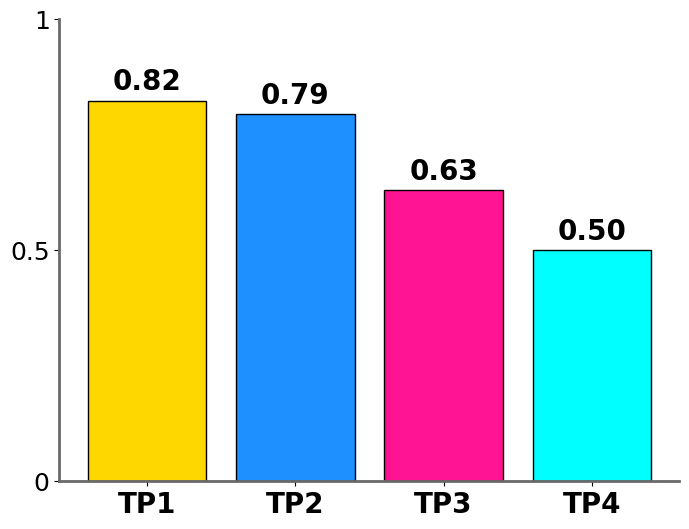

Population Vertical Index bar graph saved as PNG to: Y:/Jacqui/Critical_Period_processed&raw/Processed data/Analysis/Graphs_FENS_2025\population_vertical_index_bar_graph.png
Population Vertical Index bar graph saved as SVG to: Y:/Jacqui/Critical_Period_processed&raw/Processed data/Analysis/Graphs_FENS_2025\population_vertical_index_bar_graph.svg


In [34]:
# Assuming filtered_df_1, filtered_df_2, ..., fitted_osi_angle_deg_mod_control, etc., are defined

# Initialize lists to store data for plotting
groups = ['TP1', 'TP2', 'TP3', 'TP4']
horizontal_osi_counts = []
vertical_osi_counts = []
population_vertical_indices = []

# TP1 group calculations
# Horizontal OSI for TP1 group
tp1_horiz_peak_index = filtered_df_1['Peak Degree']
single_value_TP1_horiz_peak = tp1_horiz_peak_index.iloc[0]  
min_val_TP1H = single_value_TP1_horiz_peak - 10
max_val_TP1H = single_value_TP1_horiz_peak + 10
num_values_in_range_TP1H = np.sum((fitted_osi_angle_deg_mod_TP1 >= min_val_TP1H) & (fitted_osi_angle_deg_mod_TP1 <= max_val_TP1H))
print(f"H OSI for TP1 group: {num_values_in_range_TP1H}")

# Vertical OSI for TP1 group
tp1_vert_peak_index = filtered_df_2['Peak Degree']
single_value_TP1_vert_peak = tp1_vert_peak_index.iloc[0]  
min_val_TP1V = single_value_TP1_vert_peak - 10
max_val_TP1V = single_value_TP1_vert_peak + 10
num_values_in_range_TP1V = np.sum((fitted_osi_angle_deg_mod_TP1 >= min_val_TP1V) & (fitted_osi_angle_deg_mod_TP1 <= max_val_TP1V))
print(f"V OSI for TP1 group: {num_values_in_range_TP1V}")

# TP1 population vertical index
TP1_population_vertical_index = num_values_in_range_TP1V / (num_values_in_range_TP1V + num_values_in_range_TP1H)
print(f"TP1 population V index: {TP1_population_vertical_index}")

# Append values for plotting
horizontal_osi_counts.append(num_values_in_range_TP1H)
vertical_osi_counts.append(num_values_in_range_TP1V)
population_vertical_indices.append(TP1_population_vertical_index)


# TP2 group calculations
# Horizontal OSI for TP2 group
tp2_horiz_peak_index = filtered_df_3['Peak Degree']
single_value_TP2_horiz_peak = tp2_horiz_peak_index.iloc[0]  
min_val_TP2H = single_value_TP2_horiz_peak - 10
max_val_TP2H = single_value_TP2_horiz_peak + 10
num_values_in_range_TP2H = np.sum((fitted_osi_angle_deg_mod_TP2 >= min_val_TP2H) & (fitted_osi_angle_deg_mod_TP2 <= max_val_TP2H))
print(f"H OSI for TP2 group: {num_values_in_range_TP2H}")

# Vertical OSI for TP2 group
tp2_vert_peak_index = filtered_df_4['Peak Degree']
single_value_TP2_vert_peak = tp2_vert_peak_index.iloc[0]  
min_val_TP2V = single_value_TP2_vert_peak - 10
max_val_TP2V = single_value_TP2_vert_peak + 10
num_values_in_range_TP2V = np.sum((fitted_osi_angle_deg_mod_TP2 >= min_val_TP2V) & (fitted_osi_angle_deg_mod_TP2 <= max_val_TP2V))
print(f"V OSI for TP2 group: {num_values_in_range_TP2V}")

# TP2 population vertical index
TP2_population_vertical_index = num_values_in_range_TP2V / (num_values_in_range_TP2V + num_values_in_range_TP2H)
print(f"TP2 population V index: {TP2_population_vertical_index}")

# Append values for plotting
horizontal_osi_counts.append(num_values_in_range_TP2H)
vertical_osi_counts.append(num_values_in_range_TP2V)
population_vertical_indices.append(TP2_population_vertical_index)


# TP3 group calculations
# Horizontal OSI for TP3 group
tp3_horiz_peak_index = filtered_df_5['Peak Degree']
single_value_TP3_horiz_peak = tp3_horiz_peak_index.iloc[0]  
min_val_TP3H = single_value_TP3_horiz_peak - 10
max_val_TP3H = single_value_TP3_horiz_peak + 10
num_values_in_range_TP3H = np.sum((fitted_osi_angle_deg_mod_TP3 >= min_val_TP3H) & (fitted_osi_angle_deg_mod_TP3 <= max_val_TP3H))
print(f"H OSI for TP3 group: {num_values_in_range_TP3H}")

# Vertical OSI for TP3 group
tp3_vert_peak_index = filtered_df_6['Peak Degree']
single_value_TP3_vert_peak = tp3_vert_peak_index.iloc[0]  
min_val_TP3V = single_value_TP3_vert_peak - 10
max_val_TP3V = single_value_TP3_vert_peak + 10
num_values_in_range_TP3V = np.sum((fitted_osi_angle_deg_mod_TP3 >= min_val_TP3V) & (fitted_osi_angle_deg_mod_TP3 <= max_val_TP3V))
print(f"V OSI for TP3 group: {num_values_in_range_TP3V}")

# TP3 population vertical index
TP3_population_vertical_index = num_values_in_range_TP3V / (num_values_in_range_TP3V + num_values_in_range_TP3H)
print(f"TP3 population V index: {TP3_population_vertical_index}")

# Append values for plotting
horizontal_osi_counts.append(num_values_in_range_TP3H)
vertical_osi_counts.append(num_values_in_range_TP3V)
population_vertical_indices.append(TP3_population_vertical_index)


# TP4 group calculations
# Horizontal OSI for TP4 group
tp4_horiz_peak_index = filtered_df_7['Peak Degree']
single_value_TP4_horiz_peak = tp4_horiz_peak_index.iloc[0]  
min_val_TP4H = single_value_TP4_horiz_peak - 10
max_val_TP4H = single_value_TP4_horiz_peak + 10
num_values_in_range_TP4H = np.sum((fitted_osi_angle_deg_mod_TP4 >= min_val_TP4H) & (fitted_osi_angle_deg_mod_TP4 <= max_val_TP4H))
print(f"H OSI for TP4 group: {num_values_in_range_TP4H}")

# Vertical OSI for TP4 group
tp4_vert_peak_index = filtered_df_8['Peak Degree']
single_value_TP4_vert_peak = tp4_vert_peak_index.iloc[0]  
min_val_TP4V = single_value_TP4_vert_peak - 10
max_val_TP4V = single_value_TP4_vert_peak + 10
num_values_in_range_TP4V = np.sum((fitted_osi_angle_deg_mod_TP4 >= min_val_TP4V) & (fitted_osi_angle_deg_mod_TP4 <= max_val_TP4V))
print(f"V OSI for TP4 group: {num_values_in_range_TP4V}")

# TP4 population vertical index
TP4_population_vertical_index = num_values_in_range_TP4V / (num_values_in_range_TP4V + num_values_in_range_TP4H)
print(f"TP4 population V index: {TP4_population_vertical_index}")

# Append values for plotting
horizontal_osi_counts.append(num_values_in_range_TP4H)
vertical_osi_counts.append(num_values_in_range_TP4V)
population_vertical_indices.append(TP4_population_vertical_index)


# Calculate percentages for the OSI bar plot (Horizontal vs Vertical OSI as percentages)
total_counts = np.array(horizontal_osi_counts) + np.array(vertical_osi_counts)
horizontal_percentage = np.array(horizontal_osi_counts) / total_counts * 100
vertical_percentage = np.array(vertical_osi_counts) / total_counts * 100

# Plotting code remains unchanged


# Define the output directory
os.makedirs(output_directory, exist_ok=True)  # Create directory if it doesn't exist

### Plot 1: Horizontal vs Vertical OSI as Stacked Bar Graph ###
fig, ax1 = plt.subplots(figsize=(7, 6))

# Bar plot for Horizontal vs Vertical OSI percentages
x = np.arange(len(groups))  # Label locations
width = 1.0  # No gap between bars

# Horizontal OSI bars
ax1.bar(x, horizontal_percentage, width, color='blueviolet', edgecolor='black', alpha=0.7)

# Vertical OSI bars stacked on top of horizontal OSI bars
ax1.bar(x, vertical_percentage, width, bottom=horizontal_percentage, color='palevioletred', edgecolor='black', alpha=0.7)

# Remove the y-axis, grid, and legend
ax1.yaxis.set_visible(False)
ax1.grid(False)
ax1.legend().set_visible(False)

# Set x-axis ticks
ax1.set_xticks(x)
ax1.set_xticklabels(groups, fontweight='bold', fontsize = 22)

# Add value annotations to the bars with additional text
for i in range(len(groups)):
    # Horizontal OSI annotation
    ax1.text(i, horizontal_percentage[i] / 2, f'{horizontal_percentage[i]:.1f}%', 
             ha='center', va='center', color='white', fontweight='bold', fontsize = 22)

    # Vertical OSI annotation
    ax1.text(i, horizontal_percentage[i] + vertical_percentage[i] / 2, 
             f'{vertical_percentage[i]:.1f}%', 
             ha='center', va='center', color='white', fontweight='bold', fontsize = 22)

# Create the legend with semi-transparent background
legend_labels = ['Horizontal Preference','Vertical Preference']
legend_colors = ['palevioletred', 'blueviolet']

# Add legend in the upper right corner of the plot
legend = ax1.legend(legend_labels, loc='upper right', bbox_to_anchor=(1, 1), framealpha=0.5)

# Make the legend semi-transparent
frame = legend.get_frame()
frame.set_alpha(0.9)  # Set the transparency of the legend's background

# Save the OSI percentage bar graph as PNG and SVG
output_image_path1_png = os.path.join(output_directory, 'HvsV_percentages_bar_graph.png')
output_image_path1_svg = os.path.join(output_directory, 'HvsV_percentages_bar_graph.svg')
plt.savefig(output_image_path1_png, dpi=600)
plt.savefig(output_image_path1_svg, format='svg')
plt.show()
plt.close(fig)
print(f"OSI percentages bar graph saved as PNG to: {output_image_path1_png}")
print(f"OSI percentages bar graph saved as SVG to: {output_image_path1_svg}")


### Plot 2: Population Vertical Index as Table ###
fig, ax2 = plt.subplots(figsize=(6, 4))
ax2.axis('off')  # Turn off the axis for the table

# Data for the table
table_data = [['4dpf', f'{population_vertical_indices[0]:.2f}'],
              ['5dpf', f'{population_vertical_indices[1]:.2f}'],
              ['6dpf', f'{population_vertical_indices[2]:.2f}'],
              ['7dpf', f'{population_vertical_indices[3]:.2f}']]


# Add the table with different colors for each row
table = ax2.table(cellText=table_data, colLabels=['Group', 'Population Vertical Index'], loc='center', cellLoc='center')

# Define colors for each row
row_colors = ['peachpuff', 'mediumseagreen', 'palevioletred', 'skyblue']

# Set the colors for each row
for i, color in enumerate(row_colors):
    table[(i + 1, 0)].set_facecolor(color)  # Group column
    table[(i + 1, 1)].set_facecolor(color)  # Vertical index column

# Adjust font size and scale
table.auto_set_font_size(False)
table.set_fontsize(15)
table.scale(1.5, 2)

# Save the Population Vertical Index table as PNG and SVG
output_image_path2_png = os.path.join(output_directory, 'population_vertical_index_table.png')
output_image_path2_svg = os.path.join(output_directory, 'population_vertical_index_table.svg')
plt.savefig(output_image_path2_png, dpi=600)
plt.savefig(output_image_path2_svg, format='svg')
plt.show()
plt.close(fig)
print(f"Population Vertical Index table saved as PNG to: {output_image_path2_png}")
print(f"Population Vertical Index table saved as SVG to: {output_image_path2_svg}")


### Plot 3: Population Vertical Index as Bar Graph ###
fig, ax3 = plt.subplots(figsize=(8, 6))

# Bar graph for population vertical indices
indices = np.arange(len(groups))
ax3.bar(indices, population_vertical_indices, color=['gold', 'dodgerblue', 'deeppink', 'cyan'], edgecolor='black')

# Set y-axis labels
ax3.set_yticks([0, 0.5, 1], labels= ('0','0.5','1'),fontsize=18)


# Set x-axis labels
ax3.set_xticks(indices)
ax3.set_xticklabels(groups, fontweight='bold', fontsize = 20)
#ax3.set_xlabel('Group')
#ax3.set_title('Population Vertical Index by Group')

# Remove y-axis, grid, and borders for a minimalist look
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.grid(False)

# Set linewidth for left and bottom spines
ax3.spines['left'].set_linewidth(2)
ax3.spines['bottom'].set_linewidth(2)

# Optionally, if you need to set their colors:
ax3.spines['left'].set_color('dimgrey')  # Set left spine color if needed
ax3.spines['bottom'].set_color('dimgrey')  # Set bottom spine color if needed

# Add value annotations to the bars
for i, value in enumerate(population_vertical_indices):
    ax3.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontweight='bold', fontsize = 20)

# Save the Population Vertical Index bar graph as PNG and SVG
output_image_path3_png = os.path.join(output_directory, 'population_vertical_index_bar_graph.png')
output_image_path3_svg = os.path.join(output_directory, 'population_vertical_index_bar_graph.svg')
plt.savefig(output_image_path3_png, dpi=600)
plt.savefig(output_image_path3_svg, format='svg')
plt.show()
plt.close(fig)
print(f"Population Vertical Index bar graph saved as PNG to: {output_image_path3_png}")
print(f"Population Vertical Index bar graph saved as SVG to: {output_image_path3_svg}")


In [ ]:
#generate 3 histograms like the ones from matlab; looking the peaks 

# three separate datasets
datasets = {
    'Control Environment': fitted_osi_angle_deg_mod_control,
    'Vertical Environment': fitted_osi_angle_deg_mod_vertical,
    'Horizontal Environment': fitted_osi_angle_deg_mod_horizontal
}

# Define a list of colors to differentiate the histograms
colors = ['black', 'deeppink', 'darkcyan']

# Loop through each dataset and plot the histogram
for i, (label, data) in enumerate(datasets.items()):
    # Calculate the number of bins as the square root of the data length
    n_data = len(data)
    n_bins = int(np.sqrt(n_data))

    # Create histogram
    hist, bin_edges = np.histogram(data, bins=60)

    # Calculate bin centers
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Find peaks in the histogram
    peaks, _ = find_peaks(hist, distance=25)

    # Calculate the widths of the peaks
    results_half = peak_widths(hist, peaks, rel_height=0.5)

    # Convert widths to values on the x-axis (bin centers)
    widths = results_half[0] * np.diff(bin_edges).mean()

    # Print the peak indices, values, and widths
    for j, peak in enumerate(peaks):
        print(f"{label} - Peak {j+1}: Index = {peak}, Value = {hist[peak]}, Width = {widths[j]} at half maximum")

    # Create a new figure for each dataset
    plt.figure(figsize=(10, 6))

    # Plot the histogram with bars
    plt.bar(bin_centers, hist, width=np.diff(bin_edges).mean(), color=colors[i], alpha=0.7, label=f'{label} Histogram')

    # Plot the peaks
    plt.plot(bin_centers[peaks], hist[peaks], "x", color=colors[i])

    # Add text labels to the peaks
    for j, peak in enumerate(peaks):
        plt.text(bin_centers[peak], hist[peak] + 0.05 * hist[peak], f'{hist[peak]}', 
                 ha='center', va='bottom', color=colors[i])

    # Plot the peak widths at half maximum
    plt.hlines(*results_half[1:], color=colors[i], linestyle='--', label=f'{label} Peak Widths')
    

    # Add labels and title
    plt.xlabel('Angle')
    plt.ylabel('Number of Voxels')
    plt.title(f'Histogram with Detected Peaks and Widths - {label}')
    
    plt.xlim(25, 205)  # Adjust x-axis limits
    plt.ylim(0, 5000)  # Adjust y-axis limits

    # Add a legend
    plt.legend()
    
    #save files
    plt.savefig(os.path.join(save_dir, f'histogram_{label.lower()}.png'))

    # Show the plot
    plt.show()


NameError: name 'fitted_osi_angle_deg_mod_control' is not defined